In [4]:
from indigo import *

indigo = Indigo()

In [5]:
print("Indigo version " + indigo.version())

Indigo version 1.5.0-g1aef03cac-x86_64-win-msvc-1929


In [5]:
# pip install pandas

In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
pd.options.mode.chained_assignment = None

In [7]:
dataset = pd.read_csv("Adrenergic_dataset.csv")

In [8]:
ds_logp = dataset[["Structure", "ID", "logP"]]
ds_logp.head()

,Structure,ID,logP
0,CC\C(=C(\CC)/c1ccc(O)cc1)\c2ccc(O)cc2,CHEMBL411,4.871
1,CSc1ccc2Sc3ccccc3N(CCC4CCCCN4C)c2c1,CHEMBL479,5.900
2,COc1cccc(CCN2C3C4C5CC6C7C5C3C7C2(O)C46)c1,CHEMBL2205811,3.040
3,COc1cc(CN[C@H]2C3C4CC5C6C4CC3C6C25)cc(OC)c1OC,CHEMBL2432051,3.380
4,COc1cccc(CCN2C3C4C5CC6C7C5C3C7C2(O)C46)c1OC,CHEMBL2205813,2.899


### logP distribution

In [2]:
# pip install matplotlib

  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-8.4.0-cp39-cp39-win_amd64.whl (3.2 MB)
  Using cached kiwisolver-1.3.2-cp39-cp39-win_amd64.whl (52 kB)
Note: you may need to restart the kernel to use updated packages.


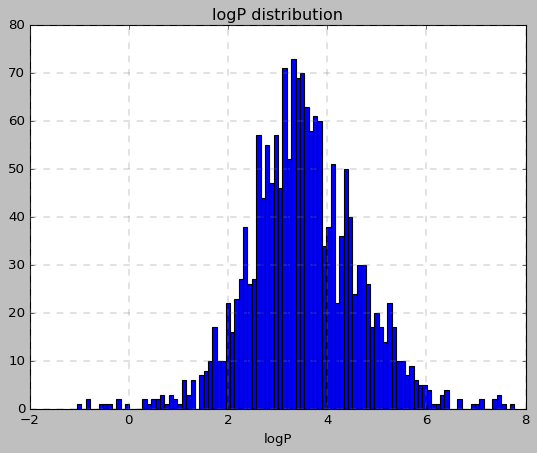

In [58]:
import matplotlib.pyplot as plt

x = ds_logp["logP"]
n, bins, patches = plt.hist(x, 100)

plt.style.use('classic')
plt.xlabel('logP')
plt.title('logP distribution')
plt.grid(True, color = "grey", linewidth = "0.4", linestyle = "dashed")
plt.show()

In [37]:
ds_adra = dataset[dataset["AdrA1A_PCHEMBL_VALUE"].notna()][["Structure", "ID", "AdrA1A_PCHEMBL_VALUE"]]
ds_adra.reset_index(inplace=True, drop=True)
ds_adra.head()

,Structure,ID,AdrA1A_PCHEMBL_VALUE
0,CNC(=O)C(CCN1CCC(O)(CC1)c2ccc(Cl)cc2)(c3ccccc3...,CHEMBL1627,8.00
1,Cc1ccc2c(cccc2n1)N3CCN(CCc4cccc5c4OCc6c(ncn56)...,CHEMBL1241913,8.56
2,COc1ccccc1OCCNCC2CSC(S2)(c3ccccc3)c4ccccc4,CHEMBL1086156,7.45
3,O[C@H]1[C@H](CC[C@@H]1Oc2ccccc2)NC[C@H]3COc4cc...,CHEMBL135974,6.41
4,COc1cccc(OC)c1OCCNC[C@H]2COc3ccccc3O2,CHEMBL1182155,9.39


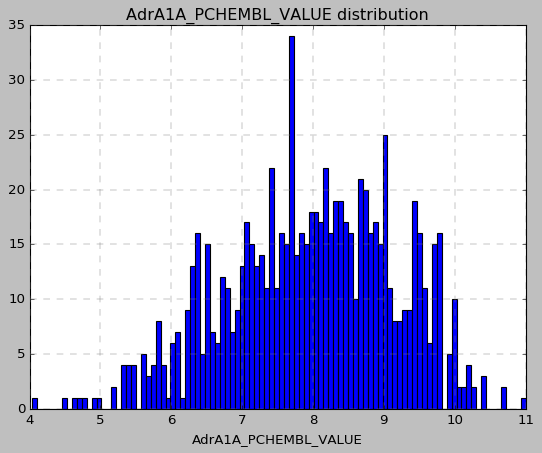

In [59]:
a = ds_adra["AdrA1A_PCHEMBL_VALUE"]
n, bins, patches = plt.hist(a, 100)

plt.style.use('classic')
plt.xlabel('AdrA1A_PCHEMBL_VALUE')
plt.title('AdrA1A_PCHEMBL_VALUE distribution')
plt.grid(True, color = "grey", linewidth = "0.4", linestyle = "dashed")
plt.show()

In [61]:
def indigo_fingerprint_short(structure: str) -> np.ndarray:
    indigo.setOption("ignore-stereochemistry-errors", True)
    indigo.setOption("ignore-bad-valence", True)
    m = indigo.loadMolecule(structure)
    m.aromatize()
    indigo.setOption("similarity-type", "ecfp6")
    indigo.setOption("fp-sim-qwords", 24)
    indigo.setOption("fp-ord-qwords", 6)
    indigo.setOption("fp-any-qwords", 6)
    indigo.setOption("fp-tau-qwords", 3)
    indigo.setOption("fp-ext-enabled", True)
    ecfp = np.frombuffer(m.fingerprint("full").toBuffer(), dtype=np.uint8)
    return ecfp

In [62]:
ds_logp["ECFP"] = [indigo_fingerprint_short(s) for s in ds_logp["Structure"]]
ds_adra["ECFP"] = [indigo_fingerprint_short(s) for s in ds_adra["Structure"]]
ds_logp.head()

,Structure,ID,logP,ECFP
0,CC\C(=C(\CC)/c1ccc(O)cc1)\c2ccc(O)cc2,CHEMBL411,4.871,"[3, 0, 0, 77, 70, 218, 234, 87, 218, 228, 213,..."
1,CSc1ccc2Sc3ccccc3N(CCC4CCCCN4C)c2c1,CHEMBL479,5.900,"[15, 3, 0, 255, 254, 254, 254, 253, 63, 251, 2..."
2,COc1cccc(CCN2C3C4C5CC6C7C5C3C7C2(O)C46)c1,CHEMBL2205811,3.040,"[7, 0, 0, 255, 95, 191, 254, 253, 122, 255, 25..."
3,COc1cc(CN[C@H]2C3C4CC5C6C4CC3C6C25)cc(OC)c1OC,CHEMBL2432051,3.380,"[7, 0, 0, 252, 223, 214, 239, 221, 94, 254, 28..."
4,COc1cccc(CCN2C3C4C5CC6C7C5C3C7C2(O)C46)c1OC,CHEMBL2205813,2.899,"[7, 0, 0, 255, 95, 255, 254, 253, 123, 255, 25..."


In [63]:
ds_adra.head()

,Structure,ID,AdrA1A_PCHEMBL_VALUE,ECFP
0,CNC(=O)C(CCN1CCC(O)(CC1)c2ccc(Cl)cc2)(c3ccccc3...,CHEMBL1627,8.00,"[15, 0, 0, 231, 126, 191, 255, 223, 62, 254, 2..."
1,Cc1ccc2c(cccc2n1)N3CCN(CCc4cccc5c4OCc6c(ncn56)...,CHEMBL1241913,8.56,"[31, 0, 0, 247, 255, 235, 255, 253, 255, 191, ..."
2,COc1ccccc1OCCNCC2CSC(S2)(c3ccccc3)c4ccccc4,CHEMBL1086156,7.45,"[7, 3, 0, 255, 239, 251, 227, 221, 251, 223, 1..."
3,O[C@H]1[C@H](CC[C@@H]1Oc2ccccc2)NC[C@H]3COc4cc...,CHEMBL135974,6.41,"[39, 0, 0, 84, 102, 219, 43, 221, 253, 255, 76..."
4,COc1cccc(OC)c1OCCNC[C@H]2COc3ccccc3O2,CHEMBL1182155,9.39,"[99, 0, 0, 124, 230, 211, 105, 221, 213, 91, 7..."


In [13]:
# pip install -U scikit-learn

In [64]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.1


In [67]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

scores = []
actual = []
predicted = []
kf = KFold(n_splits=5, random_state=42, shuffle=True)
X = ds_logp.ECFP
y = ds_logp.logP
for train_index, test_index in kf.split(X, np.zeros(len(y))):
    X = ds_logp.loc[train_index]["ECFP"].tolist()
    y = ds_logp.loc[train_index]["logP"]
    
    Xt = ds_logp.loc[test_index]["ECFP"].tolist()
    yt = ds_logp.loc[test_index]["logP"]
    
    model_logP = RandomForestRegressor(n_estimators=100, max_features=None).fit(X, y)
    predicted_logP = model_logP.predict(Xt)
    score = r2_score(yt, predicted_logP)
    print(score, "\n")
    scores.append(score)
    
    actual.append(yt)
    predicted.append(predicted_logP)

print("MEAN:", np.mean(scores))

0.7078359258567706 

0.7148744418334158 

0.6899312427748467 

0.7217938885144679 

0.7115449460035049 

MEAN: 0.7091960889966012


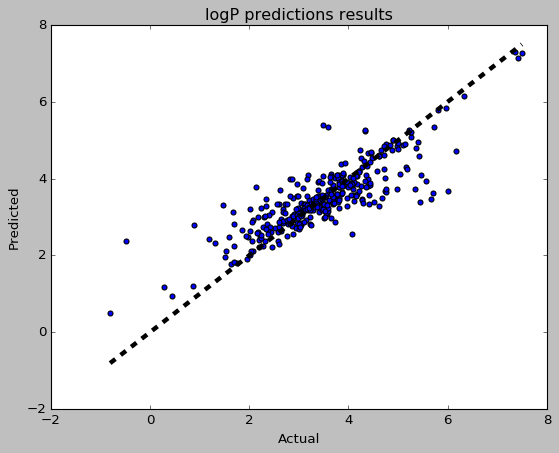

In [98]:
x = actual[0].tolist()
y = predicted[0].tolist()
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot([min(x), max(x)], [min(x), max(x)], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('logP predictions results')
plt.show()

In [106]:
abs_diff = [abs(i - j) for i, j in zip(x, y)]

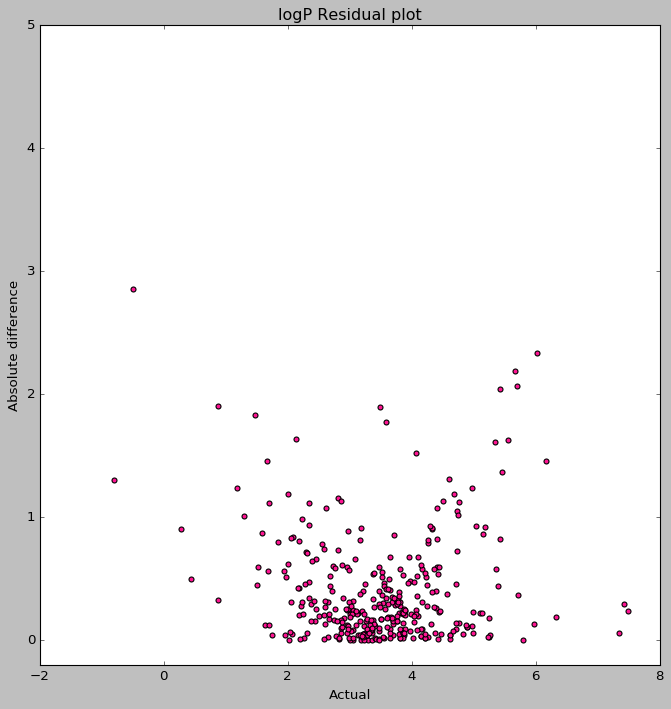

In [129]:
fig, ax = plt.subplots()
ax.scatter(x, abs_diff, c = 'deeppink', s=20)
# ax.plot([min(x), max(x)], [min(x), max(x)], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Absolute difference')

fig.set_figwidth(10)
fig.set_figheight(10)  

plt.ylim(ymax = 5, ymin = -0.2)
plt.title('logP Residual plot')
plt.show()

In [130]:
scores = []
actual_adra1 = []
predicted_adra1 = []

kf = KFold(n_splits=5, random_state=42, shuffle=True)
X = ds_adra.ECFP
y = ds_adra.AdrA1A_PCHEMBL_VALUE
for train_index, test_index in kf.split(X, np.zeros(len(y))):
    X = ds_adra.loc[train_index]["ECFP"].tolist()
    z = ds_adra.loc[train_index]["AdrA1A_PCHEMBL_VALUE"]
    
    Xt = ds_adra.loc[test_index]["ECFP"].tolist()
    zt = ds_adra.loc[test_index]["AdrA1A_PCHEMBL_VALUE"]
    
    model_Adr = RandomForestRegressor(n_estimators=100, max_features=None).fit(X, z)
    pred = model_Adr.predict(Xt)
    score = r2_score(zt, pred)
    print(score, "\n")
    scores.append(score)
    
    actual_adra1.append(zt)
    predicted_adra1.append(pred)
    
print("MEAN:", np.mean(scores))

0.5219712007477206 

0.5320009992371504 

0.6204914179565275 

0.5076786263380397 

0.5328461541061984 

MEAN: 0.5429976796771273


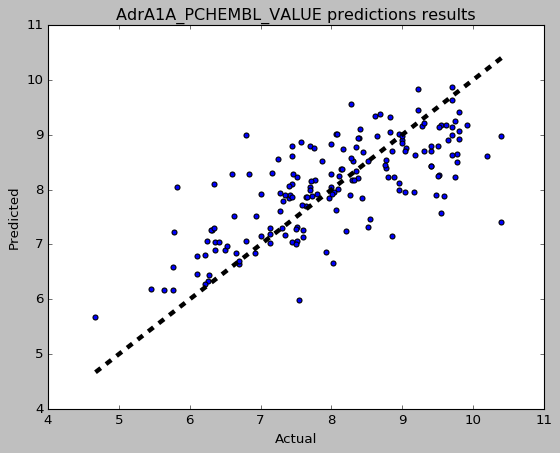

In [133]:
x = actual_adra1[0].tolist()
y = predicted_adra1[0].tolist()
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot([min(x), max(x)], [min(x), max(x)], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('AdrA1A_PCHEMBL_VALUE predictions results')
plt.show()

In [134]:
abs_diff = [abs(i - j) for i, j in zip(x, y)]

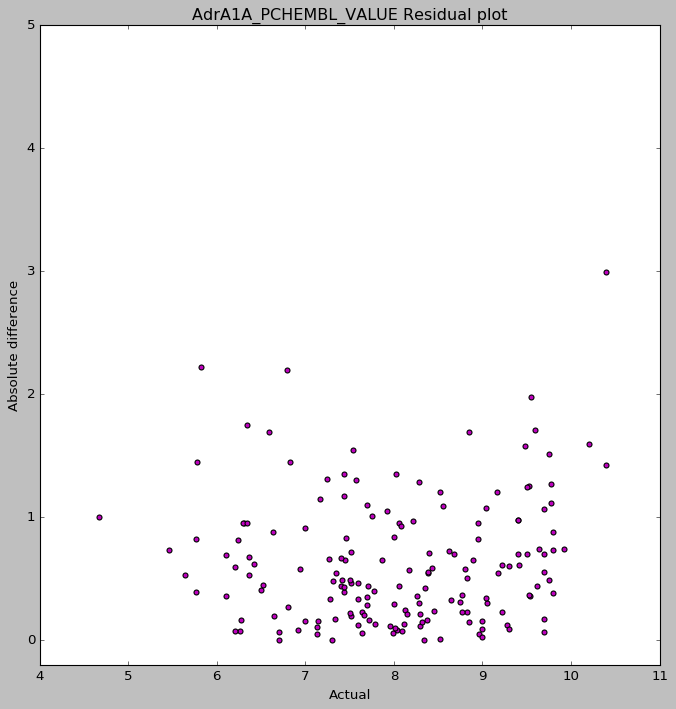

In [137]:
fig, ax = plt.subplots()
ax.scatter(x, abs_diff, c = 'm', s=20)
# ax.plot([min(x), max(x)], [min(x), max(x)], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Absolute difference')

fig.set_figwidth(10)
fig.set_figheight(10)  

plt.ylim(ymax = 5, ymin = -0.2)
plt.title('AdrA1A_PCHEMBL_VALUE Residual plot')
plt.show()